# Bases de Datos III - Proyecto (15%)

## Twitch Social Networks - Análisis de Redes Sociales en Twitch

## Introducción

Este dataset se centra en las redes de usuarios de Twitch, que es una plataforma popular para la transmisión de videojuegos en vivo. Los nodos en estas redes representan a los usuarios de Twitch, mientras que las aristas representan amistades mutuas entre ellos. El dataset incluye diversas características de los usuarios, como los juegos que les gustan y su ubicación, y se centra en la tarea de clasificación binaria de nodos para predecir si un usuario usa lenguaje explícito en sus transmisiones.

### Descripción del Dataset



#### Variables

- **Nodes (Nodos)**: Representan los usuarios individuales en la red de Twitch.
- **Edges (Aristas)**: Representan las relaciones de amistad entre los usuarios.
- **Density (Densidad)**: Es una medida de cuán conectada está la red.
- **Transitivity (Transitividad)**: Es una medida de la tendencia a formar triángulos en la red.
- **Features (Características)**: Atributos de los usuarios como juegos jugados, ubicación, y hábitos de transmisión.



#### Estadísticas del Dataset

- **Número de Nodos**: Varía entre 1,912 y 9,498 dependiendo del idioma.
- **Número de Aristas**: Varía entre 31,299 y 153,138.
- **Densidad**: Varía entre 0.002 y 0.017.
- **Transitividad**: Varía entre 0.042 y 0.131.



#### Descripción Detallada de los Archivos

##### `musae_ES_edges.csv`
Este archivo contiene las relaciones entre diferentes nodos (usuarios de Twitch). Las columnas "from" y "to" representan identificadores únicos de usuarios en Twitch. Cada fila en este archivo muestra una relación de amistad entre dos usuarios.

##### `musae_ES_features.json`
Este archivo en formato JSON contiene características de cada nodo. Cada clave es un identificador único para un nodo y el valor asociado es una lista de características. Estas pueden incluir varios aspectos como los juegos que juegan, su ubicación geográfica, etc.

Lamentablemente como no se cuenta con una leyenda o guia, nos vemos en la imposibilitados de realizar los siguientes tipoos de analisis:

1. **Análisis Descriptivo**: Sin entender qué representa cada variable, te resultará difícil realizar un análisis descriptivo significativo que ofrezca insights sobre los datos.

2. **Modelado Supervisado**: Los modelos de aprendizaje supervisado requieren un buen entendimiento de las características para ser efectivos. No saber qué representan las variables puede hacer que no sepas qué modelo aplicar ni cómo interpretar los resultados.

3. **Correlaciones y Relaciones**: Sin entender qué significan las variables, sería inútil calcular correlaciones o relaciones entre ellas, ya que no podrías interpretar el significado de estas relaciones.

En resumen, aunque puedes realizar ciertos tipos de análisis no supervisados, como agrupamiento o reducción de dimensionalidad, la falta de una leyenda o guía que explique las características limita seriamente tu capacidad para generar insights significativos o aplicables.

##### `musae_ES_target.csv`
Este archivo contiene información adicional sobre cada nodo, representada en diferentes campos:

* id: Identificador único para cada nodo.
* days: Número de días desde algún evento significativo (e.g., creación de la cuenta).
* mature: Indica si el streamer utiliza lenguaje explícito (True/False).
* views: Número de vistas que ha recibido el nodo.
* partner: Indica si el nodo es un socio de Twitch (True/False).
* new_id: Otro identificador para el nodo, aunque su uso no está claro.

#### Finalmente, las tareas posibles en este dataset son:

- Transferencia de aprendizaje
- Clasificación binaria de nodos
- Predicción de enlaces
- Detección de comunidades
- Visualización de redes

## 1. Depuraración del dataset escogido para su correcta manipulación en los análisis (10%)

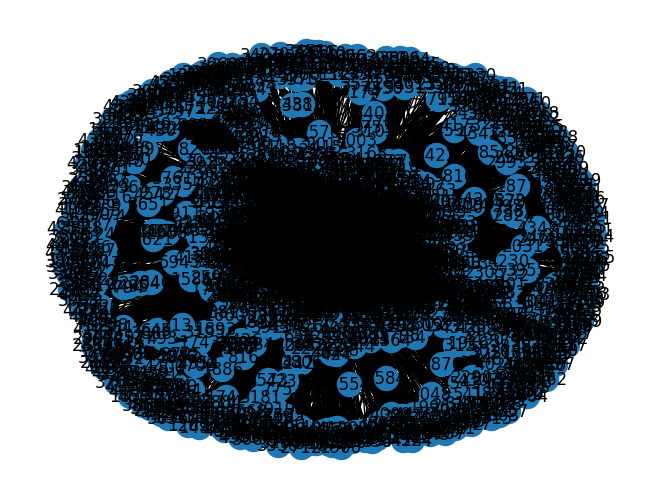

In [5]:
import pandas as pd
import networkx as nx
import json
import matplotlib.pyplot as plt

# Cargar el archivo de aristas (edges)
edges_df = pd.read_csv('./data/twitch/ES/musae_ES_edges.csv')

# Cargar el archivo de características (features)
with open('./data/twitch/ES/musae_ES_features.json', 'r') as f:
    features = json.load(f)

# Cargar el archivo de objetivos (target)
target_df = pd.read_csv('./data/twitch/ES/musae_ES_target.csv')

# Crear un grafo dirigido vacío
G = nx.DiGraph()

# Añadir aristas al grafo
for index, row in edges_df.iterrows():
    G.add_edge(row['from'], row['to'])

# Añadir atributos a los nodos
for node, feature_list in features.items():
    G.nodes[int(node)]['features'] = feature_list

# Añadir objetivos como atributos a los nodos
for index, row in target_df.iterrows():
    node_id = row['id']
    if node_id in G:
        G.nodes[node_id]['days'] = row['days']
        G.nodes[node_id]['mature'] = row['mature']
        G.nodes[node_id]['views'] = row['views']
        G.nodes[node_id]['partner'] = row['partner']
        G.nodes[node_id]['new_id'] = row['new_id']

# Ahora G es un grafo de NetworkX que contiene tanto las aristas como los atributos de los nodos.
nx.draw(G, with_labels=True)
plt.show()